In [2]:
import numpy as np
import pandas as pd

df_fake_news = pd.read_csv("Fake.csv")
df_true_news = pd.read_csv("True.csv")

In [3]:
df_fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_fake_news["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [5]:
#Create a category whether a news is fake or not
df_fake_news["category"]=1
df_true_news["category"]=0

In [6]:
#Combine both dataset
df = pd.concat([df_fake_news, df_true_news]).reset_index(drop=True)
df["category"].value_counts()

1    23481
0    21417
Name: category, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


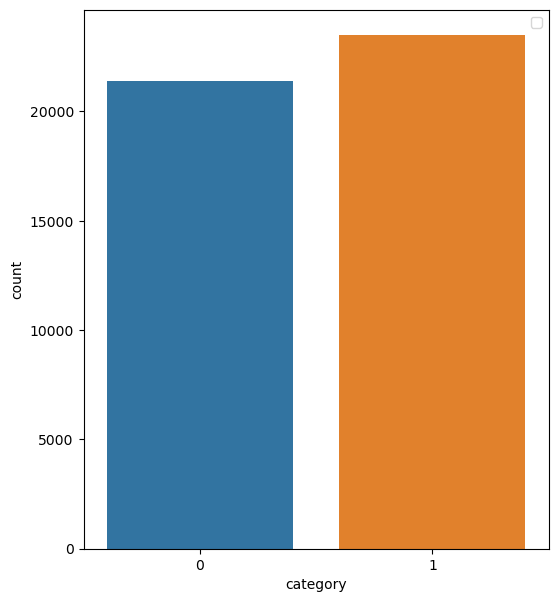

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#setting the figure size
plt.figure(figsize=(6,7))
sns.countplot(x="category", data=df)
plt.legend()

<Axes: xlabel='subject', ylabel='count'>

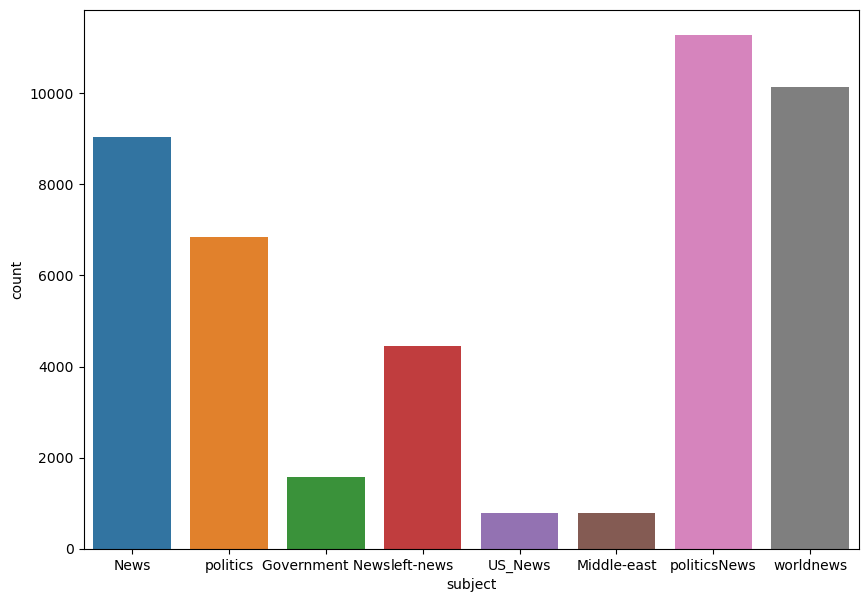

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x="subject", data=df)

In [25]:
df = df[["text","category"]]
df.head()

,text,category
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [9]:
#Clean the data
df.isnull().sum()*100/(len(df))

title       0.0
text        0.0
subject     0.0
date        0.0
category    0.0
dtype: float64

In [10]:
#Get rows with empty string of text, df.i
#blanks = df[df["text"].str.strip() == ""]
blanks = []

for index, text in df["text"].items():
    if text.isspace():
        blanks.append(index)
len(blanks)


631

In [11]:
df.shape

(44898, 5)

In [12]:
df.drop(blanks, inplace=True)
df.shape

(44267, 5)

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re